In statistics, the concept of mean squared error is a critical criterion utilized to measure the performance of an estimator. 
Write a function Fit that computes the mean square error between a list of predicted values P and a list of expected values E. 
Both P and E have the same length.

The formula for the MSE is as follows:
   MSE = 1/n * SUM((Pi-Ei)**2)

Now write a second function Compare. 
This function receives a list of 2D points (described as tuples), 
that correspond to the data we want to fit on a linear model of the form y=mx+b. 
The function also receives a series of candidate linear functions of the same form 
(described as tuples containing the m and b parameters). 
The purpose of this function is to determine the best fit from the candidate functions using the MSE as the selection criteria.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random

In [55]:
#function to calculate residual sum of squares

def RSS (y_array1, y_array2):
    return sum((y_array1 - y_array2)**2)
    

In [1]:

def Fit(P: list, E: list) -> int:
    n = len(P)
    return np.sqrt(sum([((P[i]-E[i])**2) for i in range(n)]))/n


In [2]:
def Compare(Data: list, Candidate_Parameters: list) -> list:
    x = [i[0] for i in Data]
    y = [i[1] for i in Data]
    m = [i[0] for i in Candidate_Parameters]
    b = [i[1] for i in Candidate_Parameters]
    
    sns_data = pd.DataFrame({'x':x, 'y':y})
    sns.regplot(x = 'x', y = 'y', data = sns_data)
    plt.scatter (x,y)
    
    y_pred = [[m[j]*x[i]+b[j] for i in range(len(x))] for j in range(len(m))]
    all_plots = [plt.plot(x,y_pred[i], label = (m[i],b[i])) for i in range(len(y_pred))]
    plt.legend(loc="lower right")

    mse = [Fit(y_pred[i],y) for i in range(len(y_pred))]
    best_mse = min(mse)  
    best_y_pred = y_pred[np.argmin(mse)]  
    best_cand_par = Candidate_Parameters[np.argmin(mse)]
    return plt.show(), y, best_y_pred, best_mse, best_cand_par

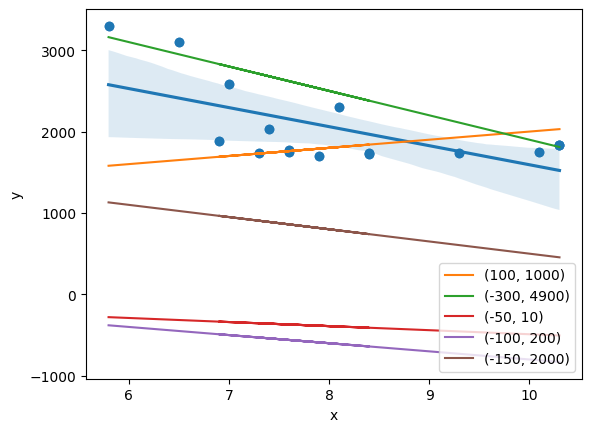

(None,
 [1838,
  1832,
  1749,
  1735,
  1729,
  1732,
  1732,
  1697,
  1745,
  1779,
  1881,
  2032,
  2302,
  2582,
  3098,
  3298],
 [1810.0,
  1810.0,
  1870.0,
  2110.0,
  2380.0,
  2710.0,
  2380.0,
  2530.0,
  2620.0,
  2620.0,
  2830.0,
  2680.0,
  2470.0,
  2800.0,
  2950.0,
  3160.0],
 147.38235509636152,
 (-300, 4900))

In [3]:
Data_list = [(10.30,1838),(10.30,1832),(10.10,1749),(9.30,1735),(8.40,1729),(7.30,1732),(8.40,1732),(7.90,1697),(7.60,1745),(7.60,1779),(6.90,1881),(7.40,2032),(8.10,2302),(7.00,2582),(6.50,3098),(5.80,3298)]
#Data_list = [(0, 6.0705199999997801e-08), (1, 2.1015700100300739e-08),  (2, 7.6280656623374823e-09), (3, 5.7348209304555086e-09), (4, 3.6812203579604238e-09), (5, 4.1572516753310418e-09)]
#Data_list = [(0, -16.617236475334405), (1, -17.67799605473062), (2, -18.691431541177973), (3, -18.9767093108359), (4, -19.420021520728017), (5, -19.298411635970396)]

Candidate_Parameters_list = [(100,1000),(-300,4900),(-50,10),(-100,200),(-150,2000)]

Compare(Data_list, Candidate_Parameters_list)

*** Calculating manually m and b, then make predictions ***

Now write a second function R that given a set of points P for a 2D space (described as tuples), 
performs an iterative search for the best fit of a linear function of the form y=mx+b. 
The search goal is, of course, a minimal MSE.

In [91]:
#function to create a dataset of 'n' samples with 'v' variance

def create_dataset (n, v, xy_corr=False):
    ys = []
    y0=0
    for i in range(n):
        yi = y0 + random.randrange(-v, v)
        ys.append(yi)
        if  xy_corr == 'pos':
            y0+= 1
        elif xy_corr == 'neg':
            y0-= 1
    xs = [i for i in range(n)]
    plt.scatter(xs,ys)
    return np.array(xs), np.array(ys)


In [92]:
from numpy import mean

def Predict(x, y, To_Predict: list):
    x_pred = np.array([i for i in To_Predict])
    
    plt.scatter (x,y)
    
    m = ((mean(x)*(mean(y)))-mean(x*y))/((mean(x)*mean(x))-mean(x*x))
    print ('m:',m)
    b = mean(y)-m*mean(x)
    print ('b:',b)
    
    y_hat = np.array([m*xi + b for xi in x])
    plt.plot(x,y_hat)
    
    y_pred = [m*xi + b for xi in x_pred]
    plt.scatter (x_pred,y_pred, color = 'g')
    
    y_mean = np.array([mean(y) for _ in y])
    plt.plot(x,y_mean, color = 'y')
    
    
    plt.show()
    return y, y_hat, y_mean

m: -0.9839384130872193
b: -1.325553319919507


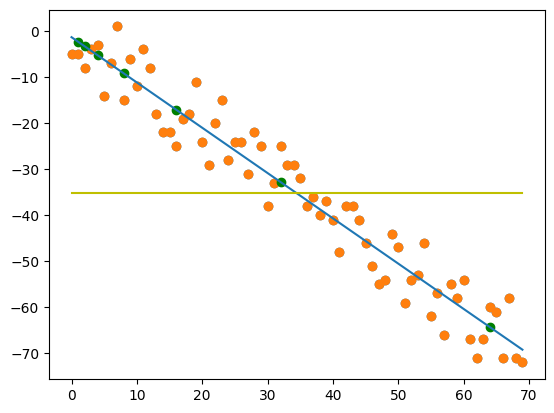

y: [ -5  -5  -8  -4  -3 -14  -7   1 -15  -6 -12  -4  -8 -18 -22 -22 -25 -19
 -18 -11 -24 -29 -20 -15 -28 -24 -24 -31 -22 -25 -38 -33 -25 -29 -29 -32
 -38 -36 -40 -37 -41 -48 -38 -38 -41 -46 -51 -55 -54 -44 -47 -59 -54 -53
 -46 -62 -57 -66 -55 -58 -54 -67 -71 -67 -60 -61 -71 -58 -71 -72] 
y_hat: [ -1.32555332  -2.30949173  -3.29343015  -4.27736856  -5.26130697
  -6.24524539  -7.2291838   -8.21312221  -9.19706062 -10.18099904
 -11.16493745 -12.14887586 -13.13281428 -14.11675269 -15.1006911
 -16.08462952 -17.06856793 -18.05250634 -19.03644476 -20.02038317
 -21.00432158 -21.98825999 -22.97219841 -23.95613682 -24.94007523
 -25.92401365 -26.90795206 -27.89189047 -28.87582889 -29.8597673
 -30.84370571 -31.82764413 -32.81158254 -33.79552095 -34.77945936
 -35.76339778 -36.74733619 -37.7312746  -38.71521302 -39.69915143
 -40.68308984 -41.66702826 -42.65096667 -43.63490508 -44.6188435
 -45.60278191 -46.58672032 -47.57065874 -48.55459715 -49.53853556
 -50.52247397 -51.50641239 -52.4903508  -53.474

In [103]:
x, y = create_dataset(70, 10, xy_corr = 'neg')

To_Predict_list = [2**i for i in range (7)]

y, y_hat, y_mean = Predict(x, y , To_Predict_list)

print ('y:', y, '\ny_hat:', y_hat, '\ny_mean:', y_mean)

In [104]:
SSR = RSS(y_mean, y_hat)
SSE = RSS(y, y_hat)
SST = RSS(y, y_mean)
R2 = SSR/SST

print('SSR= {} , SS= {} , SST= {}, R2= {}'.format(SSR,SSE,SST,R2))

SSR= 27666.872268392985 , SS= 1864.9705887498908 , SST= 29531.842857142852, R2= 0.9368488245799131
